In [1]:
# World Happiness Report

In [2]:
# Problem Statement: The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

In [3]:
# We need to predict the happiness score considering all the other factors mentioned in the dataset provided in GITHUB Link ('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')

In [4]:
# # First of all import all the required libraries like pandas, numpy, seaborn,matplotlib etc. And load the data (happiness_score_dataset.csv file) from GITHUB link ('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv') to train the model and test the model and show the top five rows of database.

In [6]:
import pandas as pd
# for data manipulation

import numpy as np          
# for mathematical calculations

import seaborn as sns   
# for data visualization

import matplotlib.pyplot as plt 
# for plotting graphs
plt.style.use('seaborn')
# the seaborn stylesheet will make our plots look neat and pretty.

%matplotlib inline                   
# "%matplotlib inline" ensures commands in cells below the cell that outputs a plot does not affect the plot
    
import warnings 
# to ignore any warnings
warnings.filterwarnings("ignore")

In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')

In [12]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [13]:
# Here size of dataset is 158 rows and 12 columns and the target variable is Happiness Score which shows continous data hence this is regression problem.

# Features Description

#Happiness Rank: A country's rank on a world scale - determined by how high their happiness score is.

#Happiness Score: A score given to a country based on adding up the rankings that a population has given to each category (normalized)

#Country: The country in question

#Region: The Region in question

#Standard Error: The Standard error in question

#Economy GDP per capita: individuals rank and their quality of life based on the amount they earn

#Family: quality of family life, nuclear and joint family

#Healthy Life Expectancy: ranking healthcare availability and average life expectancy in the country

#Freedom: Freedom to make life choices and how much an individual is able to conduct them self based on their free will

#Trust government Corruption : Perceptions of Corruption or Trust in the government to not be corrupt.

#Generosity: how much their country is involved in peacekeeping and global aid

#DSystopia Residual: Dystopia Residual in question

In [14]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [15]:
df.shape

(158, 12)

In [16]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [17]:
# Upon going through the data, some discrepancies were noticed. few columns are not revelant to target variable.
# To solve this, we will drop irrelevant columns in dataframe.

In [18]:
# Dropping irrelevant columns
# (inplace=True) argument means that changes made to the dataframe remains permanent.

In [19]:
df.drop(columns=['Standard Error', 'Region', 'Dystopia Residual'], inplace=True)

In [20]:
# here we have dropped undesired columns from dataframe and made permanent changes in dataframe

In [ ]:
# Need to check the dataframe

In [21]:
# checking the dataframe after dropping irrelavant columns

In [24]:
df

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...,...,...
153,Rwanda,154,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628
154,Benin,155,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
155,Syria,156,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179
156,Burundi,157,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727


In [117]:
# we have total 158 rows and 9 columns in dataframe

In [25]:
# Performing EDA # Checking Null Values in Dataframe

In [26]:
df.isnull().sum() #checking to see if any feature has empty/missing values

Country                          0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
dtype: int64

In [27]:
# since there are no null values present in dataset, we can proceed

In [28]:
df.columns

Index(['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity'],
      dtype='object')

In [29]:
# here we can see the columns present in dataframe

In [30]:
# Checking the datatypes of columns

In [31]:
df.dtypes

Country                           object
Happiness Rank                     int64
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
dtype: object

In [32]:
df.info()
# The info() function is used to print a concise summary of a DataFrame
# We see that after cleaning we have 158 rows of clean data with no null values. There are 9 columns and three datatypes(int, float and object)
# The data is now clean and void of unnecessary features, we can now proceed to visualizing the data to see the relationship between features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Happiness Rank                 158 non-null    int64  
 2   Happiness Score                158 non-null    float64
 3   Economy (GDP per Capita)       158 non-null    float64
 4   Family                         158 non-null    float64
 5   Health (Life Expectancy)       158 non-null    float64
 6   Freedom                        158 non-null    float64
 7   Trust (Government Corruption)  158 non-null    float64
 8   Generosity                     158 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.2+ KB


In [33]:
df.describe() #This is used to view basic statistical details like percentile, mean, std etc

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296
std,45.754363,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685
min,1.000000,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.250000,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553
50%,79.500000,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130
75%,118.750000,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883
max,158.000000,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880


In [34]:
# Data Analysis and Visualization
# Univariate plots are used to understand each feature.
# Histograms were used to view the frequency distribution of the variables.

In [35]:
# Univariate Plots
# This is the plots of each individual variable. They help us to understand each attribute better.
# checking the frequency distribution of the variables

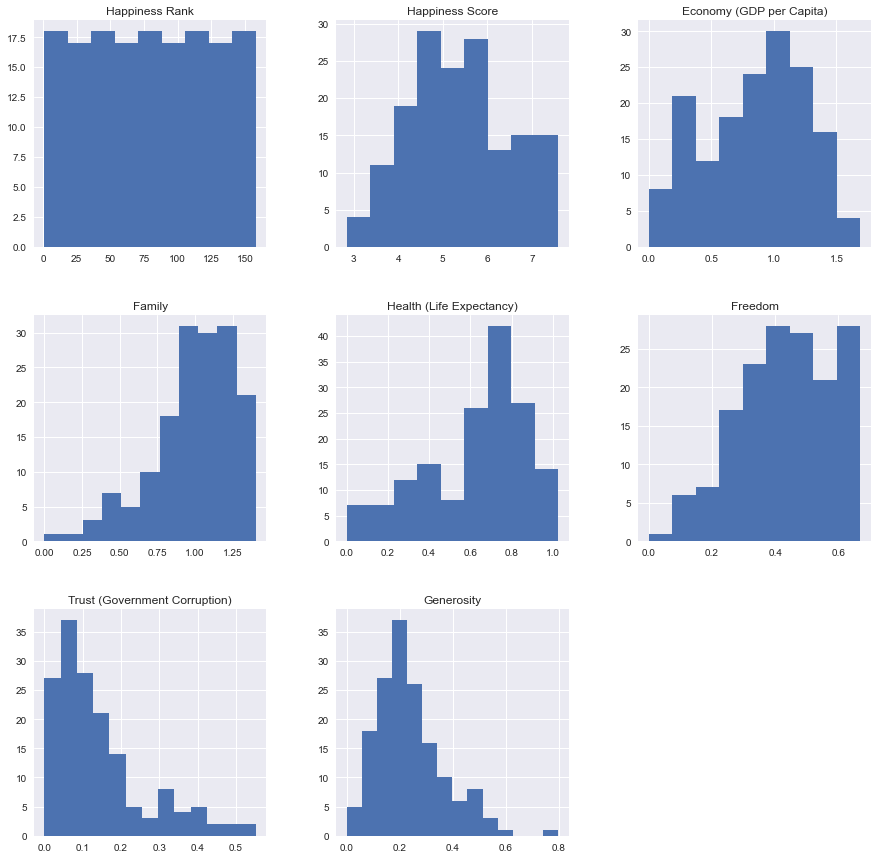

In [36]:
df.hist(bins='auto', figsize=(15,15));

In [37]:
# We can check for outliers using boxplots

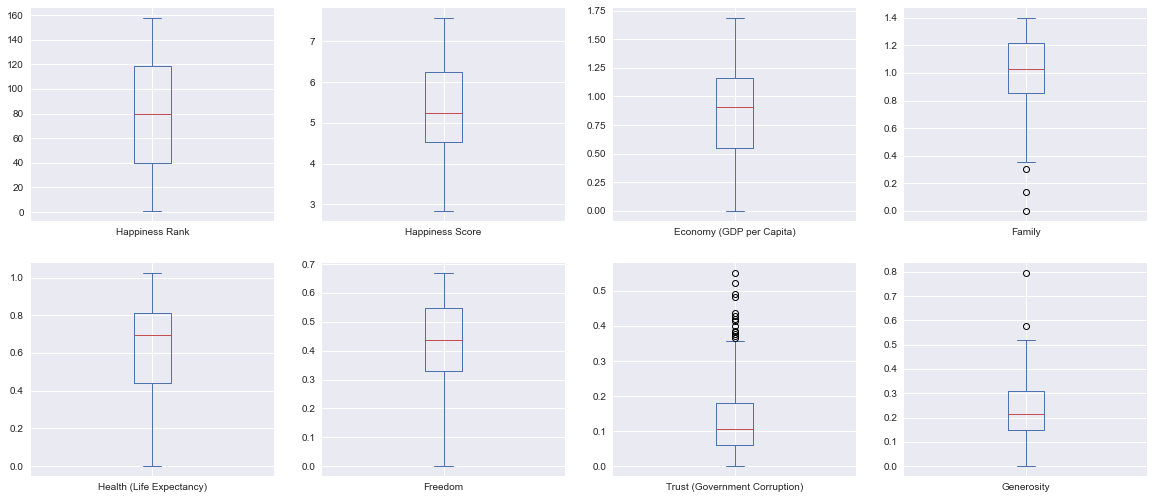

In [46]:
df[['Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']].plot(kind='box', subplots=True, layout=(4,4), figsize=(20,18), grid=True);

In [47]:
# Outliers were checked by using boxplots.
# The output shows there are outliers present in the Family, Generosity and Trust (Government Corruption) features.

In [48]:
# Bivariate Plots
# This is used to understand the relationship between variables

In [49]:
# let's see the correlation between the features using heatmap
# Checking the correlation of features helps us decide which features affect the target variable the most, and in turn, get used in predicting the target variable.

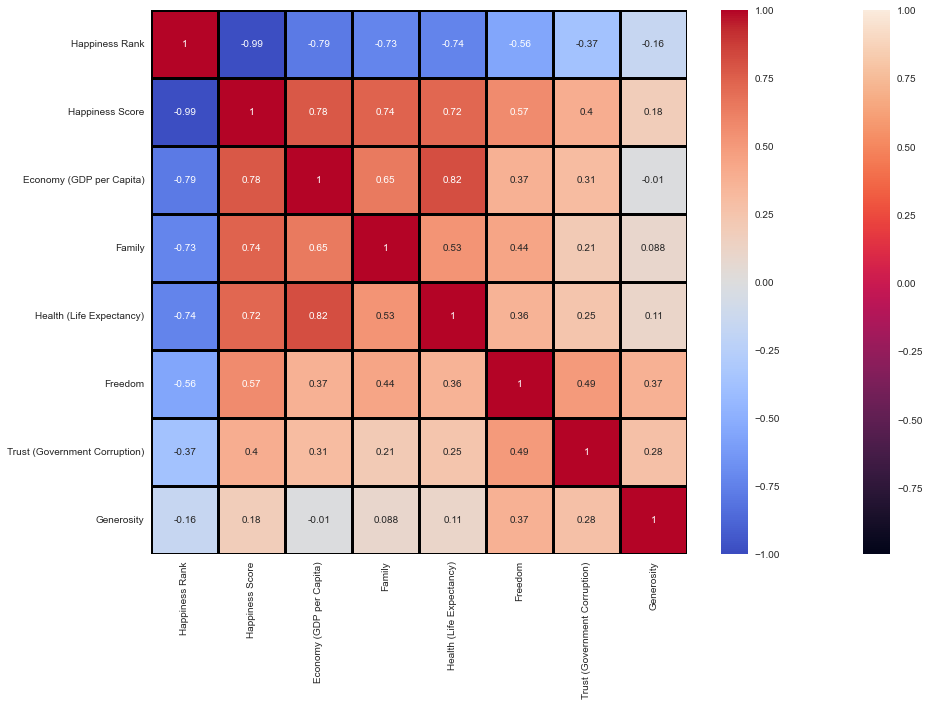

In [52]:
plt.figure(figsize=(15, 10))
# This specifies the size, the bigger the map, the easier we can understand the map
sns.heatmap(df.corr())
# This is sufficient but adding the 'annot' argument makes interpretaton easier
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')
# 'annot' helps display the correlation coefficient
plt.show()

In [53]:
# The darker the box, the stronger/higher the correlation.

# Happiness Score correlates strongly with Economy(GDP per Capita), Family and Health (Life Expectancy). It has low correlates with Generosity and Trust(Government Corruption.

# There is an inverse relationship between Happiness rank and Happiness score; the higher the score, the lower the rank.

In [103]:
# lets's further investigate the relationship between happiness score and GDP using scatter plot

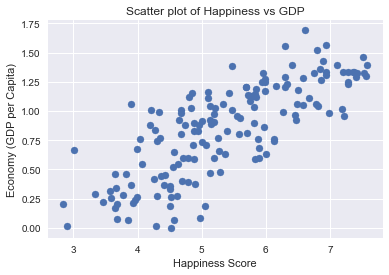

In [121]:
happiness_score = df['Happiness Score']
gdp= df['Economy (GDP per Capita)']

plt.scatter(happiness_score, gdp)
plt.title('Scatter plot of Happiness vs GDP')
plt.xlabel('Happiness Score')
plt.ylabel('Economy (GDP per Capita)')
plt.show()

In [87]:
# The above diagram shows that, the higher the GDP, the higher the happiness score

In [122]:
# We can analyse the  happiest countries from the dataframe

happy_countries = df[['Country', 'Happiness Rank']].groupby('Country').mean().sort_values(by = 'Happiness Rank', ascending = True)
happy_countries.head()

,Happiness Rank
Country,
Switzerland,1.0
Iceland,2.0
Denmark,3.0
Norway,4.0
Canada,5.0


In [123]:
# saddest countries 

sad_countries = df[['Country', 'Happiness Rank']].groupby('Country').mean().sort_values(by = 'Happiness Rank', ascending = True)
sad_countries.tail()

,Happiness Rank
Country,
Rwanda,154.0
Benin,155.0
Syria,156.0
Burundi,157.0
Togo,158.0


In [126]:
# What countries have the highest GDP per capita over the years?

rich_countries = df[['Country', 'Economy (GDP per Capita)']].groupby('Country').mean().sort_values(by='Economy (GDP per Capita)', ascending=False)
rich_countries.head()

,Economy (GDP per Capita)
Country,
Qatar,1.69042
Luxembourg,1.56391
Kuwait,1.55422
Singapore,1.52186
Norway,1.45900


In [128]:
# What countries have the highest life expectancy over the years?

healthy_countries = df[['Country', 'Health (Life Expectancy)']].sort_values(by='Health (Life Expectancy)', ascending=False)
healthy_countries.head()

,Country,Health (Life Expectancy)
23,Singapore,1.02525
71,Hong Kong,1.01328
45,Japan,0.99111
46,South Korea,0.96538
35,Spain,0.95562


In [129]:
# lowest life expectancy

low_life_expectancy = df[['Country', 'Health (Life Expectancy)']].sort_values(by='Health (Life Expectancy)', ascending=False)
low_life_expectancy.tail()

,Country,Health (Life Expectancy)
96,Lesotho,0.07612
100,Swaziland,0.07566
147,Central African Republic,0.06699
127,Botswana,0.04776
122,Sierra Leone,0.00000


In [ ]:
# Modeling and Prediction
# Now that the data is clean and we have an understandng of the variables, we can now construct a model.
# First, we drop any categorical variables, and the happiness rank as that is not something we are exploring in this report.

In [132]:
# We will drop the Country variable because it is categorical, we will also drop the happiness rank variable beacuse it's irrelevant to this model
# this leaves only numerical features in the data frame

In [133]:
new_df = df.drop(['Country', 'Happiness Rank'], axis=1)
new_df.head()


,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [134]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Score                158 non-null    float64
 1   Economy (GDP per Capita)       158 non-null    float64
 2   Family                         158 non-null    float64
 3   Health (Life Expectancy)       158 non-null    float64
 4   Freedom                        158 non-null    float64
 5   Trust (Government Corruption)  158 non-null    float64
 6   Generosity                     158 non-null    float64
dtypes: float64(7)
memory usage: 8.8 KB


In [135]:
# The info() function is used to print a concise summary of a DataFrame
# We see that after cleaning we have 158 rows of clean data with no null values. There are 7 columns and only one datatypes(float)

In [136]:
# let's split our data into training(80%) and testing(20%) sets

In [138]:
from sklearn.model_selection import train_test_split
# features with low corelation has been removed

X = new_df[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom']]
y = new_df['Happiness Score']

# X = features, y = target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [139]:
# Next we need to scale the data before feeding it to the model
# To standardize our data, we need to import the StandardScaler from the sklearn library 

In [140]:
from sklearn.preprocessing import StandardScaler 

scale = StandardScaler()

new_df = scale.fit_transform(new_df)

In [144]:
# Training the algorithm

from sklearn.linear_model import LinearRegression

lm = LinearRegression()
# instantiating the model

lm.fit(X_train, y_train) 
# fitting the model with the training dataset


#print(lm.coef_)

LinearRegression()

In [145]:
# making predictions on the test data

y_pred = lm.predict(X_test)

# comparing actual values with predicted values
actual_vs_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
actual_vs_pred 

,Actual,Predicted
7,7.364,6.949774
44,5.995,6.001739
113,4.633,4.448699
120,4.514,4.613922
63,5.716,5.912345
122,4.507,4.252135
121,4.512,4.073864
139,3.956,3.918721
109,4.686,4.710638
92,5.007,5.377577


In [146]:
coefficient = lm.coef_

#making a dataframe of the coeffiecients to help us easily determine which variable carries more weight


coefficient_df = pd.DataFrame(list(zip(X.columns, lm.coef_)), columns=['features', 'coefficients'])
coefficient_df

,features,coefficients
0,Economy (GDP per Capita),0.914757
1,Family,1.418679
2,Health (Life Expectancy),0.902836
3,Freedom,1.934132


In [147]:
# From the output above, we see that, Freedom and Family is the most important factor contributing to happiness of citizens, as opposed to the result we got from the heatmap.

# This shows that correlation doesn't necessarily mean causation. Health and GDP are also important but carry less weight in this model.

In [148]:
#Model Evaluation
#For this model, we will use the most common evaluation metric for regressions:
# Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors

In [149]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE


print('Root Mean Squared Error:', np.sqrt(MSE(y_test, y_pred)))

Root Mean Squared Error: 0.5937109307075935


In [150]:
# The lower the RMSE, the better the model is at making predictions.The RMSE is low, further feature engineering can lead to a lower RMSE score.

In [ ]:
# Conclusion
# The factors influence the happiness of citizens the most are # Freedom and Family as great determinants of Happiness score and can be used to predict the future scores.